# Friendship Paradox

#### Author: [Erika Fille Legara](https://erikalegara.site)

[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://github.com/eflegara/Network-Science-Lectures/blob/master/LICENSE.md)

---


<table align="left" border=0>
<!-- <table class="tfo-notebook-buttons" align="left"> -->
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/eflegara/Network-Science-Lectures/blob/master/Friendship%20Paradox.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/eflegara/Network-Science-Lectures/blob/master/Friendship%20Paradox.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>


---

Do you think you have more friends than your friends, on average? Or do they have more friends than you have, on average? 

In 1991, sociologist [Scott L. Feld](https://scholar.google.com/citations?user=Qh24zNEAAAAJ&hl=en) observed and [reported](https://www.journals.uchicago.edu/doi/10.1086/229693) the [friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox), which says that most people have fewer friends that their friends have. Do you believe this?

Let's investigate.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
G = nx.barabasi_albert_graph(1500,m=5)

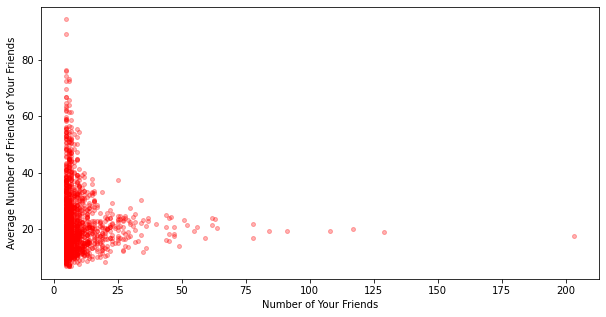

In [3]:
yourfriends = []
foyf = []
for i in G.nodes():
    neighbors = list(G.neighbors(i))
    deg_size = []
    for n in neighbors:
        deg_size.append(G.degree[n])
    yourfriends.append(G.degree[i])
    foyf.append(np.mean(deg_size))

plt.figure(figsize=(10,5))
plt.plot(yourfriends, foyf, 
         'r.', alpha=0.3, markersize=8)
plt.xlabel('Number of Your Friends');
plt.ylabel('Average Number of Friends of Your Friends');

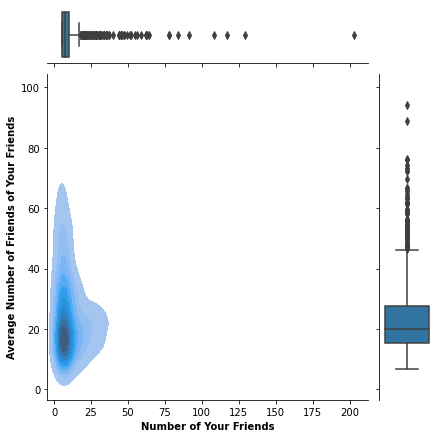

In [4]:
g = sns.JointGrid(x=yourfriends, y=foyf)
g.plot_joint(sns.kdeplot, fill=True)
g.plot_marginals(sns.boxplot);
g.ax_joint.set_xlabel('Number of Your Friends', 
                      fontweight='bold');
g.ax_joint.set_ylabel('Average Number of Friends of Your Friends', 
                      fontweight='bold');

In [5]:
print('In this phenomenological network, individuals \
have around {:.0f} friends while their friends have around {:.0f} \
friends, on average!'.format(int(np.mean(yourfriends)), 
                             int(np.mean(foyf))))


In this phenomenological network, individuals have around 9 friends while their friends have around 23 friends, on average!


Indeed, from the plot, we can see that the number of friends of individuals is, on average, fewer than that of their friends's. 

Why do you think this is the case?

## How about in the real-world?

Yes, we used a model network to show the so-called friendship paradox. Do you think the same is observed for many real-world networks?

In [6]:
def check_paradox(G):
    yourfriends = []
    foyf = []
    
    for i in G.nodes():
        neighbors = list(G.neighbors(i))
        deg_size = []
        
        for n in neighbors:
            deg_size.append(G.degree[n])    
        
        # just make sure to include individuals with neighbors
        if deg_size:
            yourfriends.append(G.degree[i])
            foyf.append(np.mean(deg_size))
        
    g = sns.JointGrid(x=yourfriends, y=foyf)
    g.plot_joint(sns.kdeplot, fill=True)
    g.plot_marginals(sns.boxplot);
    g.ax_joint.set_xlabel('Your Degree of Connectivity', 
                          fontweight='bold');
    g.ax_joint.set_ylabel('Average Degree of Your Connections', 
                          fontweight='bold');
    
    print('In this phenomenological network, individuals have around {:.0f} connections while their connections have around {:.0f} connections, on average!'.format(int(np.mean(yourfriends)), 
                                 int(np.mean(foyf))))
    
    return


In this phenomenological network, individuals have around 27 connections while their connections have around 99 connections, on average!


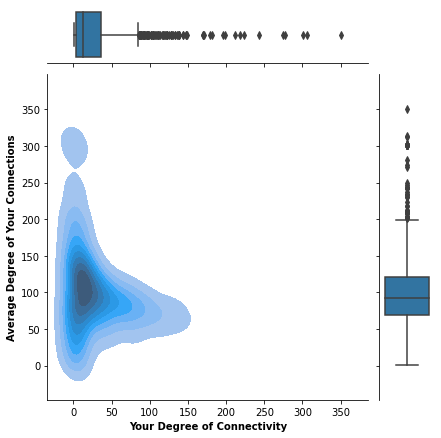

In [7]:
G = nx.read_gml("./datasets/polblogs copy.gml")
G = G.to_undirected()
G = nx.Graph(G)
check_paradox(G)

In this phenomenological network, individuals have around 3 connections while their connections have around 5 connections, on average!


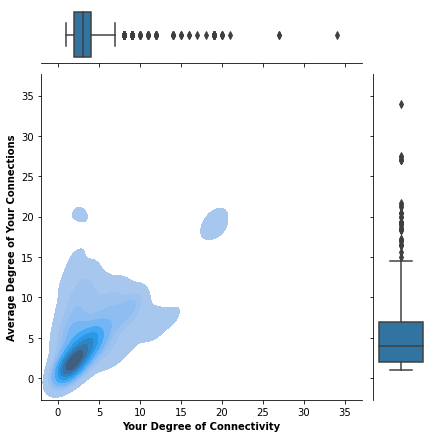

In [8]:
G = nx.read_gml("./datasets/netscience.gml")
G = G.to_undirected()
G = nx.Graph(G)
check_paradox(G)

In this phenomenological network, individuals have around 14 connections while their connections have around 31 connections, on average!


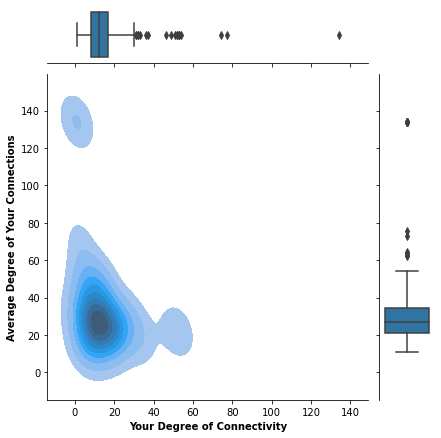

In [9]:
G = nx.read_gml("./datasets/celegansneural.gml")
G = G.to_undirected()
G = nx.Graph(G)
check_paradox(G)